In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
Titanic = pd.read_csv("Titanic-Dataset.csv")
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [6]:
print("\nInitial Data Overview:")
print(Titanic.head())


Initial Data Overview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.

In [7]:
Titanic.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

In [10]:
Titanic["Age"] = Titanic["Age"].fillna(Titanic["Age"].median())
Titanic["Embarked"] = Titanic["Embarked"].fillna(Titanic["Embarked"].mode()[0])

In [13]:
Titanic = pd.get_dummies(Titanic, columns=["Sex", "Embarked"], drop_first=True)

In [15]:
X = Titanic.drop("Survived", axis=1)
y = Titanic["Survived"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [18]:
y_pred = model.predict(X_test)

In [19]:
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 0.8100558659217877

Confusion Matrix:
[[90 15]
 [19 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



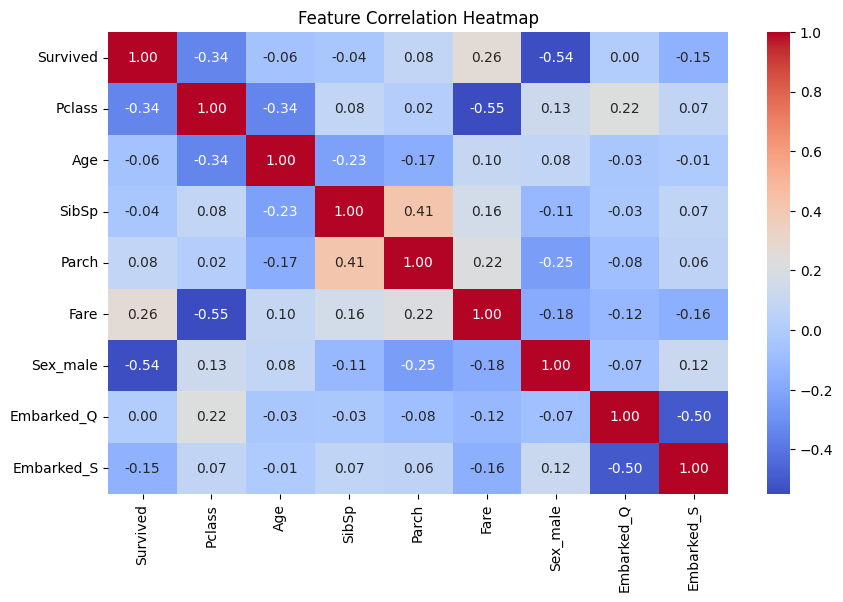

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(Titanic.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()